In [1]:
!date

Mon Apr 28 14:26:23 EDT 2025


In [2]:
pwd

'/mmfs1/data/aglinska/BC-ABCD-denoise/Code'

In [3]:
import nbformat
import os
from tqdm import tqdm
import shutil
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn import linear_model
from matplotlib import pyplot as plt

/data/aglinska/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import pickle
def load_pickle(filename):
    with open(filename,"rb") as filehandler:
        dump = pickle.load(filehandler)
    return dump

In [5]:
model_names = ['conv_denoise',
'conv_denoise500',
'conv_denoise_bn',
'conv_denoise_large',
'conv_denoise_large500',
'conv_smooth',
'conv_smooth-small',
'conv_weights_unet_denoise',
'conv_weights_unet_denoise500',]
model_names.sort()

In [6]:
errors = []

'../Data/StudyForrest/Stefano_adv_papermill/'

In [10]:
rep = 0
analysis_name = f'new-stefano-conv-allSubs-rep-{rep}'
indir = '../Data/StudyForrest/Stefano_adv_papermill/'
notebooks_dir = os.path.join(indir,analysis_name)
notebooks = [f for f in os.listdir(notebooks_dir) if f.endswith('.ipynb')]
notebooks.sort()
n = len(notebooks)
print(n)

56


In [28]:
outputs_dir = os.path.join('../Data/StudyForrest/Stefano_adv_outputs/',analysis_name)
if not os.path.exists(outputs_dir):
    os.mkdir(outputs_dir)

In [37]:
for rep in tqdm([0]):
    analysis_name = f'new-stefano-conv-allSubs-rep-{rep}'
    indir = '../Data/StudyForrest/Stefano_adv_papermill/'
    notebooks_dir = os.path.join(indir,analysis_name)
    notebooks = [f for f in os.listdir(notebooks_dir) if f.endswith('.ipynb')]
    notebooks.sort()
    n = len(notebooks)
    for s in range(14):
        for r in [1,2,3,4]:
            notebook_path = os.path.join(notebooks_dir,f'ensembling-method-S{s}-R{r}.ipynb')
            if os.path.exists(notebook_path):
                assert os.path.exists(notebook_path),'bad path'
                with open(notebook_path, 'r', encoding='utf-8') as f:
                    notebook = nbformat.read(f, as_version=4)                    
                target_outputs = []
                for cell in notebook['cells']:
                    if cell['cell_type'] == 'code' and 'save_derivs(weights_ofn)' in cell['source']:
                        # Check if the cell has outputs
                        if 'outputs' in cell:
                            for output in cell['outputs']:
                                # Extract the text output if available
                                if output['output_type'] == 'stream' and 'text' in output and 'saved as' in output['text']:
                                    target_outputs.append(output['text'].replace("\n",'').replace('saved as: ',''))
                                    target_outputs.sort()
                if len(target_outputs)==9:
                    for i in range(len(target_outputs)):
                        
                        target_name = target_outputs[i]
                        if os.path.exists(target_name):
                            src = target_name
                            dst = os.path.join(outputs_dir,f'{model_names[i]}-S_{s}-R_{r}-rep_{rep}.pickle')
                            shutil.copyfile(src,dst)

                        target_name = target_outputs[i].replace('.pickle','.nii.gz')
                        if os.path.exists(target_name):
                            src = target_name
                            dst = os.path.join(outputs_dir,f'{model_names[i]}-S_{s}-R_{r}-rep_{rep}.nii.gz')
                            shutil.copyfile(src,dst)

                        target_name = target_outputs[i].replace('.pickle','.weights')
                        if os.path.exists(target_name):
                            src = target_name
                            dst = os.path.join(outputs_dir,f'{model_names[i]}-S_{s}-R_{r}-rep_{rep}.weights')
                            shutil.copyfile(src,dst)

100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:15<00:00, 15.97s/it]


In [43]:

done_check = np.array([[all([os.path.exists(os.path.join(os.path.join(outputs_dir,f'{model_names[0]}-S_{s}-R_{r}-rep_{rep}.pickle'))) for r in [1,2,3,4]]) for s in range(14)] for rep in range(11)])


Text(0.5, 0, 'repetition')

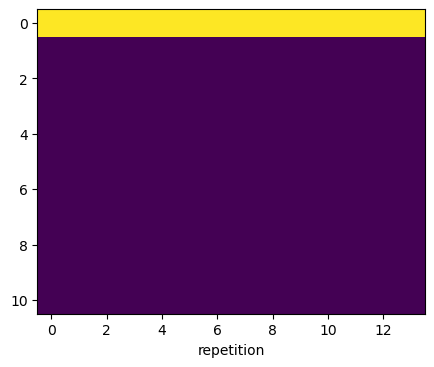

In [53]:
plt.figure(figsize=(5,15))
plt.imshow(done_check,vmin=0,vmax=1);
plt.xlabel('subject')
plt.xlabel('repetition')